###Importing the libraries

In [506]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

###Downloading the stopwords

In [507]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###Checking what are stopwords

In [508]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

###Data Preprocessing

In [509]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

In [510]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


###Dataset shape

In [511]:
dataset.shape

(1000, 2)

###checking missing values

In [512]:
print(pd.isnull(dataset).sum())

Review    0
Liked     0
dtype: int64


###Features and target

In [513]:
x = dataset['Review']
y = dataset['Liked']

In [514]:
x.head()

,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...


In [515]:
y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


###Checking the balance of the dataset

<Axes: xlabel='count', ylabel='Liked'>

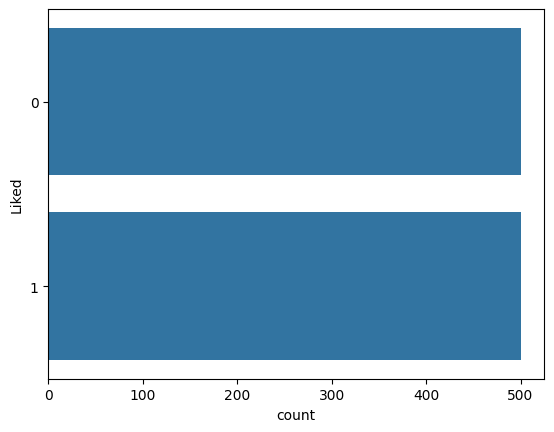

In [516]:
sns.countplot(y='Liked', data=dataset)

###Stemming

In [517]:
ps = PorterStemmer()

In [518]:
def stemming(Review):
  #re.sub() → "substitute" function from Python’s regex (re) module.
  #'[^a-zA-Z]' → regex pattern meaning “any character that is NOT a letter (A–Z or a–z)”.
  #' ' → replaces those characters with a space.
  #Message → your input text string.
  stemmed_content = re.sub('[^a-zA-Z]', ' ', Review)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

###Applying stemmed content to features

In [519]:
x = x.apply(stemming)

In [520]:
x

,Review
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price
...,...
995,think food flavor textur lack
996,appetit instantli gone
997,overal impress would go back
998,whole experi underwhelm think go ninja sushi n...


In [521]:
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


###Implementing bag of words method

In [522]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x)

In [523]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5372 stored elements and shape (1000, 1565)>

###Splitting the data into train and test

In [524]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

###Model training

In [525]:
from sklearn.svm import SVC
model = SVC(kernel='poly', random_state=42)
model.fit(X_train, Y_train)

SVC(kernel='poly', random_state=42)

###Model Prediction

In [526]:
Y_pred = model.predict(X_test)

###Data visualization of test and predicted

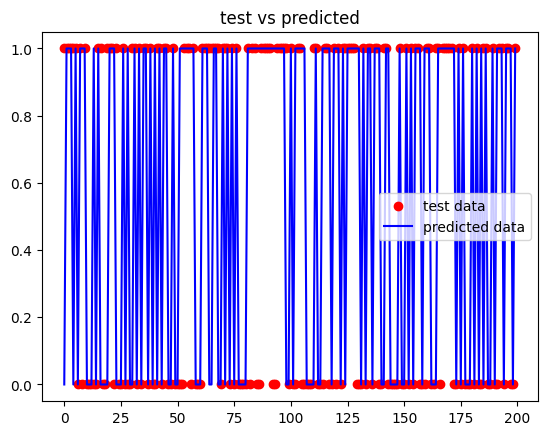

In [527]:
plt.title('test vs predicted')
plt.scatter(range(len(Y_test)), Y_test, color='red', label='test data')
plt.plot(range(len(Y_pred)), Y_pred, color='blue', label='predicted data')
plt.legend()
plt.show()

###Confusion matrix

<Axes: >

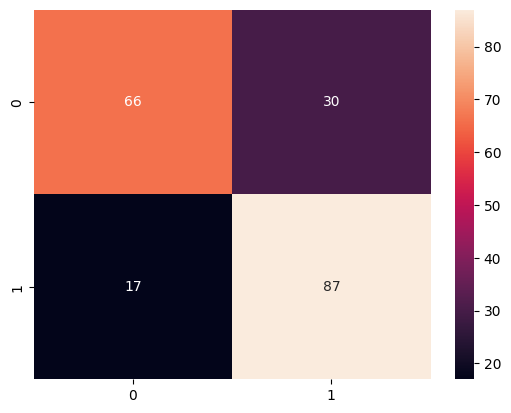

In [528]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True)

###Classification report and Accuracy

In [529]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        96
           1       0.74      0.84      0.79       104

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



In [530]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(Y_test, Y_pred), 2) * 100
print(f"The accuracy of the model is: {accuracy}")

The accuracy of the model is: 77.0


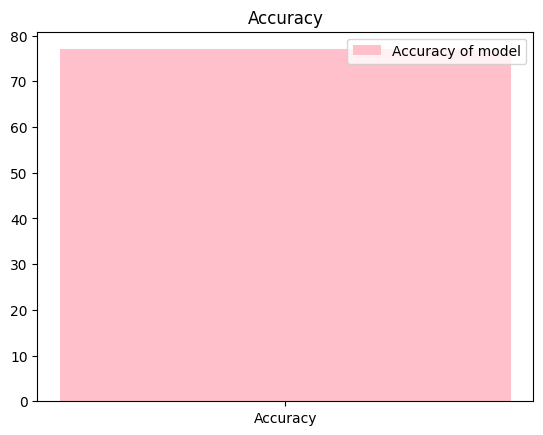

In [531]:
plt.title('Accuracy')
plt.bar("Accuracy", accuracy, color='pink', label='Accuracy of model')
plt.legend()
plt.show()